<a href="https://colab.research.google.com/github/sangwooan/ML_PLAC/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sin 곡선 예측 RNN 모델 사용

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,LSTM,SimpleRNN

time step만큼 시퀀스 데이터 분리

In [2]:
def split_sequence(sequence,step):
  x,y=list(),list()

  for i in range(len(sequence)):
    end_idx=i+step
    if end_idx > len(sequence)-1:
      break

    seq_x,seq_y=sequence[i:end_idx],sequence[end_idx]
    x.append(seq_x)
    y.append(seq_y)

  return np.array(x), np.array(y)

sin 함수 학습 데이터

In [4]:
x=[i for i in np.arange(start=-10,stop=10,step=0.1)]
train_y=[np.sin(i) for i in x]

하이퍼파라미터

In [6]:
n_timesteps=15
n_feature=1

시퀀스 나누기

In [7]:
train_x,train_y=split_sequence(train_y,step=n_timesteps)
print('shape x: {} / y: {}'.format(train_x.shape,train_y.shape))

shape x: (185, 15) / y: (185,)


RNN 입력 벡터 크기를 맞추기 위해 벡터 차원 크기 변경

reshape from [samples, timesteps] into [samples, timesteps, features]

In [8]:
train_x=train_x.reshape(train_x.shape[0],train_x.shape[1],n_feature)
print('train_x.shape= {}'.format(train_x.shape))
print('train_y.shape= {}'.format(train_y.shape))

train_x.shape= (185, 15, 1)
train_y.shape= (185,)


rnn 모델 정의

In [10]:
model= Sequential()
model.add(SimpleRNN(units=10,return_sequences=False,input_shape=(n_timesteps,n_feature)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

모델 학습

In [11]:
np.random.seed(0)
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor='loss',
    patience=5,
    mode='auto'
)
history=model.fit(train_x,train_y,epochs=1000,callbacks=[early_stopping])

Epoch 1/1000
6/6 [==============================] - 1s 5ms/step - loss: 0.0334
Epoch 2/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0207
Epoch 3/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0137
Epoch 4/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0104
Epoch 5/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0085
Epoch 6/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0079
Epoch 7/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 8/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0067
Epoch 9/1000
6/6 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 10/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 11/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0049
Epoch 12/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 13/1000
6/6 [==============================

loss 그래프 생성

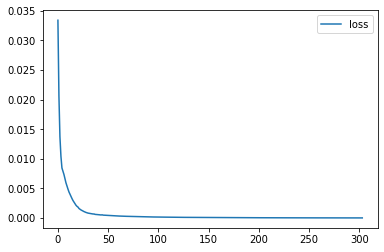

In [12]:
plt.plot(history.history['loss'],label='loss')
plt.legend(loc='upper right')
plt.show()

테스트 데이터셋 생성

In [13]:
test_x=np.arange(10,20,0.1)
calc_y=np.cos(test_x)

rnn 모델 예측 및 로그 저장

In [14]:
test_y=calc_y[:n_timesteps]
for i in range(len(test_x)-n_timesteps):
  net_input=test_y[i:i+n_timesteps]
  net_input=net_input.reshape((1,n_timesteps,n_feature))
  train_y=model.predict(net_input,verbose=0)
  print(test_y.shape,train_y.shape,i,i+n_timesteps)
  test_y=np.append(test_y,train_y)

(15,) (1, 1) 0 15
(16,) (1, 1) 1 16
(17,) (1, 1) 2 17
(18,) (1, 1) 3 18
(19,) (1, 1) 4 19
(20,) (1, 1) 5 20
(21,) (1, 1) 6 21
(22,) (1, 1) 7 22
(23,) (1, 1) 8 23
(24,) (1, 1) 9 24
(25,) (1, 1) 10 25
(26,) (1, 1) 11 26
(27,) (1, 1) 12 27
(28,) (1, 1) 13 28
(29,) (1, 1) 14 29
(30,) (1, 1) 15 30
(31,) (1, 1) 16 31
(32,) (1, 1) 17 32
(33,) (1, 1) 18 33
(34,) (1, 1) 19 34
(35,) (1, 1) 20 35
(36,) (1, 1) 21 36
(37,) (1, 1) 22 37
(38,) (1, 1) 23 38
(39,) (1, 1) 24 39
(40,) (1, 1) 25 40
(41,) (1, 1) 26 41
(42,) (1, 1) 27 42
(43,) (1, 1) 28 43
(44,) (1, 1) 29 44
(45,) (1, 1) 30 45
(46,) (1, 1) 31 46
(47,) (1, 1) 32 47
(48,) (1, 1) 33 48
(49,) (1, 1) 34 49
(50,) (1, 1) 35 50
(51,) (1, 1) 36 51
(52,) (1, 1) 37 52
(53,) (1, 1) 38 53
(54,) (1, 1) 39 54
(55,) (1, 1) 40 55
(56,) (1, 1) 41 56
(57,) (1, 1) 42 57
(58,) (1, 1) 43 58
(59,) (1, 1) 44 59
(60,) (1, 1) 45 60
(61,) (1, 1) 46 61
(62,) (1, 1) 47 62
(63,) (1, 1) 48 63
(64,) (1, 1) 49 64
(65,) (1, 1) 50 65
(66,) (1, 1) 51 66
(67,) (1, 1) 52 67
(68

예측 결과 그래프 그리기

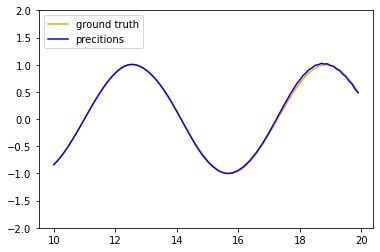

In [15]:
plt.plot(test_x,calc_y,label='ground truth',color='orange')
plt.plot(test_x,test_y,label='precitions',color='blue')
plt.legend(loc='upper left')
plt.ylim(-2,2)
plt.show()